In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pandas import *
import random

# Project Description

In Ecology, there's a well known phenomenon called the Competitive Exclusion Principle. This principle states that two species who share the same niche can't coexist, so one will be driven to extinction. Though this is true in many circumstances, many exceptions exist in nature where there are multiple species coexisting who share the same or very similar niches. There are many potential reasons for this unexpected coexistence, including fluctuating resources, differing life strategies, and the presence of predators. In this project, I will be examining the effect of the presence of a predator on the ability of prey species to coexist. I will examine the probability for coexistence of two species without a predator, with an unbiased predator, and with a predator that is biased towards the most abundant prey. In addition, I will change the reproduction rate of the predator to determine how that influences the potential for coexistence. Reproduction rate will influence how quickly the predator population grows and therefore changes the intensity of the predation pressure. My main research question for this project is, "What predator conditions are most likely to allow for coexistence of prey species that share a niche?" A secondary research question is, "What predator conditions lead to a stable system, be that with coexitence or without?"

Since I am interested in coexistence, I will first model the interactions between two functionally identical prey species in the absence of a predator to determine how likely coexistence is possible in the absence of prey, as well as for how long it is possible. I will then model the interactions between two prey species and a predator who eats prey randomly to determine the likelihood of coexistence. By modeling this, I will determine if the sheer presence of a predator is enough to enable coexistence. Finally, I will model the interactions between two prey species and a predator who is selective for the most abundant prey. Through comparing the two situations with predators, I can determine how important a selective predator is for coexistence. My hypothesis is that coexistence will only be possibly in the presence of a selective predator, as a predator eating randomly should just be equivalent to an increased mortality rate for the prey species. 

I will also change the reproduction rates of the predator. This could potentially mimic the different types of predators possible in natural environments, some of which are more efficient at transforming energy from prey into offspring and would therefore have a higher birth rate (which I will call consumption efficiency). By examining this, I can determine not only if selective predators enable coexistence better than nonselective (as would be expected), but also how predator consumption efficiency influences coexistence. I hypothesize that mid-level consumption efficiencies (0.4-0.6) will be more likely to promote prey coexistence than either extreme. 

In this project, I will consider the prey's food to be constant as trying to add in a fluctuating food supply would make the project much more difficult and beyond the scope of my abilities.

Controls will also be involve in this project. One type of control will show that each prey species populating a space independently will be able to survive and grow exponentially. The situation where the two prey species are together without a predator is like another control, as we know they can't coexist together in the absencce of predators (though it might take a long time for one to be excluded). 

The model used in this project will be an agent-based moddel. The model will involve a spatial area that is populated by the species in question (prey and predator). The prey species will be "bunnies" and "squirrels" and the predator species will be "wolves". The rules governing the model will change somewhat during the course of the model, but the ones that will be the same throughout all the scenarios are outlined below:

1. If you choose a cell containing a bunny, it has a 50% chance of moving to another cell and a 50% chance of reproducing.
2. If you choose a cell containing a squirrel, it also has a 50% chance of moving to another cell and a 50% chance of reproducing. 
3. If you choose an empty cell then nothing will happen.
4. If you choose a predator, it will always eat a prey species but whether it eats and reproduces or just eats and moves to that location will depend on the predator reproduction rate. 

In [4]:
#In this model, the agenets will be represented by:
bunny=1
squirrel=2
wolf=3

# Functions

The following functions will be used in my project.

#### Create Arena

This function will create the spatial area in which I will study the population dynamics of prey and predator species (hereafter called "the arena"). It will create an empty arena, which I can later populate.

[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]


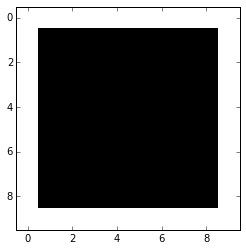

In [5]:
def createArena(xDim,yDim):
    #Create an empty list that will be the spatial area of this model.
    arena=list()
    #Add as many empty lists into arena as desired to make x dimension (columns).
    for x in range(xDim):  
        arena.append(list())
        #Add as many zeros into each column as desired to make y dimension (rows)
        for y in range(yDim):
            arena[x].append(0)
            #Create walls around all sides of arena
            if x==0 or x==xDim-1 or y==0 or y==yDim-1:
                arena[x][y]=5
    return arena

arena=list()
imshow(createArena(10,10), "gray", interpolation="nearest") 
print createArena(10,10)
#The arena was created correctly with walls on all sides.

#### Populate Arena

This function will be used to create and populate the arena in which I will run my model. The arena will be a defined space with borders that the animals cannot move beyond. 

In [6]:
def populateArena(arena,animal,startingPop):
    #Choose random coordinates to put an animal there.
    for n in range(startingPop):
        xCoordinate=random.randint(0,xDim-1)
        yCoordinate=random.randint(0,yDim-1)
        #This makes sure there's not already an animal at that set of coordinates and finds new ones if so.
        while arena[xCoordinate][yCoordinate]!=0:
            xCoordinate=random.randint(0,xDim-1)
            yCoordinate=random.randint(0,yDim-1)
        #Populates that coordinate location with whatever type of animal you want.
        arena[xCoordinate][yCoordinate]=animal
    return arena

#Test of function to ensure if is performing the expected function.
xDim=5
yDim=5
arena=createArena(xDim,yDim)
bunny=1
bunnyStartPop=3
print populateArena(arena,bunny,bunnyStartPop)    
#The function populated the arena with 3 bunnies as desired, so it is working.

[[5, 5, 5, 5, 5], [5, 1, 0, 1, 5], [5, 0, 0, 0, 5], [5, 1, 0, 0, 5], [5, 5, 5, 5, 5]]


#### Find New Location

This function will find the new location that an animal in the model will move to when it moves.

In [7]:
def findNewLocation(currentX,currentY,xMax,yMax,xMin,yMin):
    xStep=0
    yStep=0
    #This while loop makes sure the animal doesn't go outside the boundaries of the arena and that it does move.
    while ((xStep==0) and (yStep==0)) or ((currentX+xStep)<xMin) or ((currentX+xStep)>=xMax) or ((currentY+yStep)<yMin) or ((currentY+yStep)>=yMax):
        xStep=random.randint(-1,1)
        yStep=random.randint(-1,1)
    #Gives the new location of the animal.
    newX=currentX+xStep
    newY=currentY+yStep
    return newX,newY

#This is a test of the function to make sure it give a location within the bounds of the arena.
print findNewLocation(0,0,10,10,-1,-1)

(1, 1)


#### Track Population

This function keeps track of each species' population (keeps a count of each population).

In [8]:
def trackPopulation(arena):
    #Establish the population counter.
    populationCount=[0,0,0,0]
    #This counts every cell in the arena and tallies the number of individuals of each species in the arena.
    for x in range(len(arena)):
        for y in range(len(arena)):
            if arena[x][y]!=5:
                populationCount[arena[x][y]]=populationCount[arena[x][y]]+1
    return populationCount

#Testing the function to make sure it works correctly.
xDim=5
yDim=5
bunny=1
bunnyStartPop=3
arena=createArena(xDim,yDim)
arena=populateArena(arena,bunny,bunnyStartPop)
print trackPopulation(arena)
#In the conditions given above, there were 3 bunnies and no other animals, so this function works correctly.

[6, 3, 0, 0]


#### Eat Bunny

If a wolf is going to eat a bunny, this function will choose a random bunny around the wolf and make the wolf 'eat' that bunny (by replacing it with a wolf).

In [9]:
def eatBunny(arena,xPosition,yPosition,predatorReproductionRate):
    #these are all the positions around the wolf
    xOffsetList=[0,1,1,1,0,-1,-1,-1]
    yOffsetList=[-1,-1,0,1,1,1,0,-1]
    #chooses a random position around the wolf
    xOffset=random.randint(0,7)
    yOffset=random.randint(0,7)
    #tells the wolf where it will eat
    whereToEat=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    #ensures only a position with a bunny is chosen
    while whereToEat!=1:
        xOffset=random.randint(0,7)
        yOffset=random.randint(0,7)
        whereToEat=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    if random.random()<predatorReproductionRate:
        #if smaller than reproduction rate then predator reproduces
        arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]=3
    else:
        #predator moves to new location (eating prey) without reproducing
        arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]=3
        arena[xPosition][yPosition]=0
    return arena

#Test of function to make sure it's working properly
arena=[[5,5,5,5],[5,3,1,5],[5,0,0,5],[5,5,5,5]]
print eatBunny(arena,1,1,0.5)
#bunny was replaced by wolf so working

[[5, 5, 5, 5], [5, 0, 3, 5], [5, 0, 0, 5], [5, 5, 5, 5]]


#### Eat Squirrel

If a wolf is going to eat a squirrel, this function will choose a random squirrel around the wolf and make the wolf 'eat' that squirrel (by replacing it with a wolf).

In [10]:
def eatSquirrel(arena,xPosition,yPosition,predatorReproductionRate):
    #these are all the positions around the wolf
    xOffsetList=[0,1,1,1,0,-1,-1,-1]
    yOffsetList=[-1,-1,0,1,1,1,0,-1]
    #chooses a random position around the wolf
    xOffset=random.randint(0,7)
    yOffset=random.randint(0,7)
    #tells the wolf where it will eat
    whereToEat=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    #ensures only a position with a squirrel is chosen
    while whereToEat!=2:
        xOffset=random.randint(0,7)
        yOffset=random.randint(0,7)
        whereToEat=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    if random.random()<predatorReproductionRate:
        #if smaller than reproduction rate then predator reproduces
        arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]=3
    else:
        #predator moves to new location (eating prey) without reproducing
        arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]=3
        arena[xPosition][yPosition]=0
    return arena

#Test of function to make sure it's working properly
arena=[[5,5,5,5],[5,3,2,5],[5,0,0,5],[5,5,5,5]]
print eatSquirrel(arena,1,1,0.5)
#squirrel was eaten and predator moved to location so working

[[5, 5, 5, 5], [5, 3, 3, 5], [5, 0, 0, 5], [5, 5, 5, 5]]


#### Eat Any

If a wolf is going to eat any kind of prey (either because it eats randomly or because there are equal numbers of each prey species around it), this function will choose a random prey around the wolf and make the wolf 'eat' that prey (by replacing it with a wolf).

In [11]:
def eatAny(arena,xPosition,yPosition,predatorReproductionRate):
    #these are all the positions around the wolf
    xOffsetList=[0,1,1,1,0,-1,-1,-1]
    yOffsetList=[-1,-1,0,1,1,1,0,-1]
    #chooses a random position around the wolf
    xOffset=random.randint(0,7)
    yOffset=random.randint(0,7)
    #tells the wolf where it will eat
    whereToEat=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    #ensures only a prey item is chosen
    while whereToEat==0 or whereToEat==5 or whereToEat==3:
        xOffset=random.randint(0,7)
        yOffset=random.randint(0,7)
        whereToEat=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    if random.random()<predatorReproductionRate:
        #if smaller than reproduction rate then predator reproduces
        arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]=3
    else:
        #predator moves to new location (eating prey) without reproducing
        arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]=3
        arena[xPosition][yPosition]=0
    return arena

#Test of function to make sure it's working properly
arena=[[5,5,5,5],[5,3,1,5],[5,2,0,5],[5,5,5,5]]
print eatAny(arena,1,1,0.5)
#predator ate/moved to squirrel location so working

[[5, 5, 5, 5], [5, 3, 3, 5], [5, 2, 0, 5], [5, 5, 5, 5]]


#### Move Instead of Eat

If a wolf is surrounded by no prey then this function will move it to a new position without it eating a prey and reproducing.

In [12]:
def moveNotEat(arena,xPosition,yPosition):
    #these are all the positions around the wolf
    xOffsetList=[0,1,1,1,0,-1,-1,-1]
    yOffsetList=[-1,-1,0,1,1,1,0,-1]
    #chooses a random position around the wolf
    xOffset=random.randint(0,7)
    yOffset=random.randint(0,7)
    #tells the wolf where it will move
    whereToMove=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    #makes sures doesn't try to move to another wolf or wall
    while whereToMove!=0:
        xOffset=random.randint(0,7)
        yOffset=random.randint(0,7)
        whereToMove=arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]
    #moves wolf to new position
    arena[xPosition+xOffsetList[xOffset]][yPosition+yOffsetList[yOffset]]=3
    arena[xPosition][yPosition]=0
    return arena

#Test of function to make sure it's working properly
arena=[[5,5,5,5],[5,3,0,5],[5,0,0,5],[5,5,5,5]]
print moveNotEat(arena,1,1)
#wolf moved location so working

[[5, 5, 5, 5], [5, 0, 0, 5], [5, 0, 3, 5], [5, 5, 5, 5]]


#### Create List to Track Coexistence

This function will create a list that can be used to track how often coexistence occurs in every trial of the simulations.

In [13]:
def createCoexistenceTrackingList(listName,length):
    for x in range(length):  
        listName.append(0)
    return listName

testList=list()
print createCoexistenceTrackingList(testList,4)

[0, 0, 0, 0]


# Model

My model starts from here on.

## Bunny Control

In this control, bunnies are alone in the arena to show that in the absence of other prey species or predators they can grow to reach their carrying capacity and will not die out (which is this case means they will grow to fill the arena completely or almost completely).

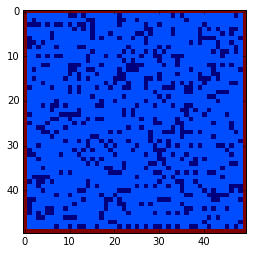

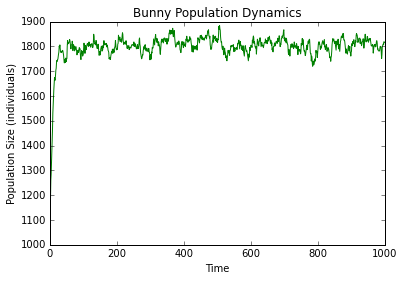

In [33]:
#Bunny Control
xDim=50
yDim=50
xMin=1 #has to be 1 to account for wall
yMin=1 
xMax=xDim-1 #have to subtract 1 to account for wall
yMax=yDim-1
bunnyStartPop=1000
Ntime=1000
Nmoves=1000

#First, create the arena and make it empty
arena=createArena(xDim,yDim)
#Next, populate the arena with bunnies and squirrels
arena=populateArena(arena,bunny,bunnyStartPop)

#make lists to hold species population counts so can track changes
bunnyCount=list()

#main simulation loop
for time in range(Ntime):
    for moves in range(Nmoves):
        #pick a random location in the arena
        xPosition=random.randint(1,xDim-1)
        yPosition=random.randint(1,yDim-1)

        #do different activities based on what's at location
        if arena[xPosition][yPosition]==1: #a bunny is in this location
            newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin) #find new location
            if random.random()>0.5:
                #move to that new location
                if arena[newX][newY]==0:
                    arena[newX][newY]=1
                    arena[xPosition][yPosition]=0
            else:
                #OR make offspring in that new location
                if arena[newX][newY]==0:
                    arena[newX][newY]=1

        #this will cause random mortality
        if random.random()<0.1:
            x=random.randint(1,xDim-1)
            y=random.randint(1,yDim-1)
            while arena[x][y]==5: #double check to make sure not 'killing' wall
                x=random.randint(1,xDim-1)
                y=random.randint(1,yDim-1)
            arena[x][y]=0
            
    #count the bunny population every new 'time' (outside of moves loop)    
    count=trackPopulation(arena)
    bunnyCount.append(count[1])

#visualize both arena and population dynamics    
imshow(arena,interpolation="nearest")
figure()
title("Bunny Population Dynamics")
plot(bunnyCount,'g')
xlabel("Time")
ylabel("Population Size (individuals)")

## Squirrel Control

In this control, squirrels are alone in the arena to show that in the absence of other prey species or predators they can grow to reach their carrying capacity and will not die out (which is this case means they will grow to fill the arena completely or almost completely).

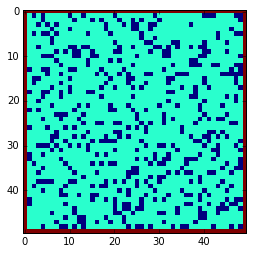

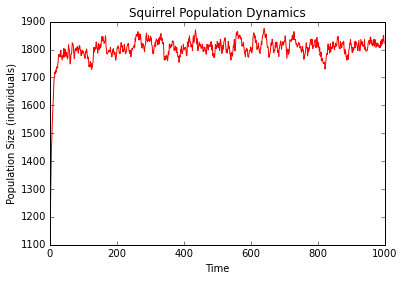

In [34]:
#Squirrel Control
xDim=50
yDim=50
xMin=1 #has to be 1 to account for wall
yMin=1
xMax=xDim-1 #have to subtract 1 to acount for wall
yMax=yDim-1
squirrelStartPop=1000
Ntime=1000
Nmoves=1000

#First, create the arena and make it empty
arena=createArena(xDim,yDim)
#Next, populate the arena with bunnies and squirrels
arena=populateArena(arena,squirrel,squirrelStartPop)

#make lists to hold species population counts so can track changes
squirrelCount=list()

#main simulation loop
for time in range(Ntime):
    for moves in range(Nmoves):
        #pick a random location in the arena
        xPosition=random.randint(1,xDim-1)
        yPosition=random.randint(1,yDim-1)

        #do different activities based on what's at location

        if arena[xPosition][yPosition]==2: #a squirrel is in this location
            newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin) #find new location
            if random.random()>0.5:
                #move to that new location
                if arena[newX][newY]==0:
                    arena[newX][newY]=2
                    arena[xPosition][yPosition]=0
            else:
                #OR make offspring in that new location
                if arena[newX][newY]==0:
                    arena[newX][newY]=2

        #this will cause random mortality
        if random.random()<0.1:
            x=random.randint(1,xDim-1)
            y=random.randint(1,yDim-1)
            while arena[x][y]==5: #double check to make sure not 'killing' wall
                x=random.randint(1,xDim-1)
                y=random.randint(1,yDim-1)
            arena[x][y]=0
    #count the squirrel population every new 'time' (outside of moves loop) 
    count=trackPopulation(arena)
    squirrelCount.append(count[2])
    
#visualize both arena and population dynamics    
imshow(arena,interpolation="nearest")
figure()
title("Squirrel Population Dynamics")
plot(squirrelCount,'r')
xlabel("Time")
ylabel("Population Size (individuals)")

## Condition 1: Species Interaction Without Predator

To first show that the competitive exclusion principle is accurate, I have a control simulation where the two prey species (bunnies and squirrels) are in the arena without a predator to show that they are incapable of coexisting.

NOTE: The cell below takes a LONG TIME to run (at least an hour long) so you should reduce the number of trials, time, and moves to much smaller numbers if you want it to run faster.

The two species were able to coexist 1 times.


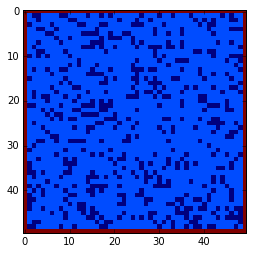

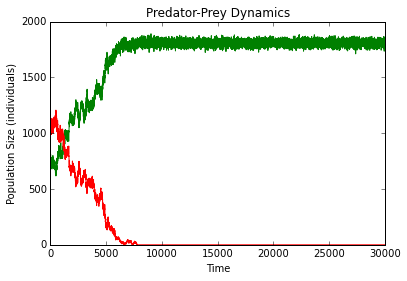

In [35]:
#Without Predator
xDim=50
yDim=50
xMin=1 #has to be 1 to account for wall
yMin=1
xMax=xDim-1 #have to subtract 1 to account for wall
yMax=yDim-1
bunnyStartPop=1000
squirrelStartPop=1000
numberCoexistCondition1=0 #this will keep count of how often the prey species coexist
Ntime=30000 #change this to change how many loops the main simulation loop runs through
Nmoves=2000 #change this to change how moves are done before the populations are recorded (makes it faster)
Ntrials=10 #change this to change how many times the whole simulation loop runs through (change sample size)

#run 10 trials to see how often coexistence occurs so can compare between conditions
for trials in range(Ntrials):
    #First, create the arena and make it empty
    arena=createArena(xDim,yDim)
    #Next, populate the arena with bunnies and squirrels
    arena=populateArena(arena,bunny,bunnyStartPop)
    arena=populateArena(arena,squirrel,squirrelStartPop)

    #make lists to hold species population counts so can track changes
    bunnyCount=list()
    squirrelCount=list()

    #main simulation loop
    for time in range(Ntime): #have to run a long time without a predator present b/c exclusion takes long time
        for moves in range(Nmoves): #have inner loop so only count population after every 2000 moves (so faster)
            #pick a random location in the arena
            xPosition=random.randint(1,xDim-1)
            yPosition=random.randint(1,yDim-1)

            #do different activities based on what's at location
            if arena[xPosition][yPosition]==1: #a bunny is in this location
                newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin) #find a new location
                if random.random()>0.5:
                    #move to new location
                    if arena[newX][newY]==0:
                        arena[newX][newY]=1
                        arena[xPosition][yPosition]=0
                else:
                    #OR make offspring in new location
                    if arena[newX][newY]==0:
                        arena[newX][newY]=1
            else:
                if arena[xPosition][yPosition]==2: #a squirrel is in this location
                    newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin) #find new location
                    if random.random()>0.5: 
                        #move to new location
                        if arena[newX][newY]==0:
                            arena[newX][newY]=2
                            arena[xPosition][yPosition]=0
                    else:
                        #OR make offspring in new location
                        if arena[newX][newY]==0:
                            arena[newX][newY]=2

            #this will cause random mortality
            if random.random()<0.1:
                x=random.randint(1,xDim-1) #choose random place to kill
                y=random.randint(1,yDim-1)
                while arena[x][y]==5: #double check to make sure not 'killing' wall
                    x=random.randint(1,xDim-1)
                    y=random.randint(1,yDim-1)
                arena[x][y]=0
                
        #since this is outside inner loop, only counts it after every N moves    
        count=trackPopulation(arena)
        bunnyCount.append(count[1])
        squirrelCount.append(count[2])
        
    if bunnyCount[Ntime-1]!=0 and squirrelCount[Ntime-1]!=0: #track how many trials the prey species coexist by looking at final population sizes
        numberCoexistCondition1=numberCoexistCondition1+1
    
    if trials==1: #only show graphs for 1 random trial to save time/space
        imshow(arena,interpolation="nearest")
        figure()
        title("Predator-Prey Dynamics")
        plot(bunnyCount,'g')
        plot(squirrelCount,'r')
        xlabel("Time")
        ylabel("Population Size (individuals)")

print "The two species were able to coexist {0} times.".format(numberCoexistCondition1)

The two species were able to coexist 10 times.


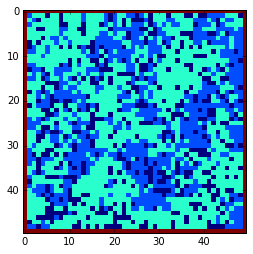

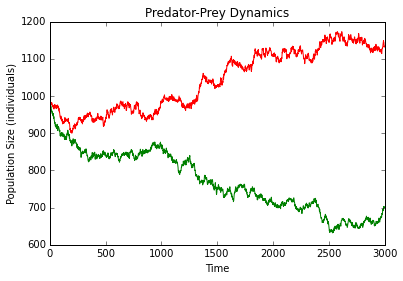

In [14]:
#Here you can see that coexistence is much higher if you run this simulation for a much shorter period of time.
#Without Predator
xDim=50
yDim=50
xMin=1 #has to be 1 to account for wall
yMin=1
xMax=xDim-1 #have to subtract 1 to account for wall
yMax=yDim-1
bunnyStartPop=1000
squirrelStartPop=1000
numberCoexistCondition1=0 #this will keep count of how often the prey species coexist
Ntime=3000 #change this to change how many loops the main simulation loop runs through
Nmoves=100 #change this to change how moves are done before the populations are recorded (makes it faster)
Ntrials=10 #change this to change how many times the whole simulation loop runs through (change sample size)

#run 10 trials to see how often coexistence occurs so can compare between conditions
for trials in range(Ntrials):
    #First, create the arena and make it empty
    arena=createArena(xDim,yDim)
    #Next, populate the arena with bunnies and squirrels
    arena=populateArena(arena,bunny,bunnyStartPop)
    arena=populateArena(arena,squirrel,squirrelStartPop)

    #make lists to hold species population counts so can track changes
    bunnyCount=list()
    squirrelCount=list()

    #main simulation loop
    for time in range(Ntime): #have to run a long time without a predator present b/c exclusion takes long time
        for moves in range(Nmoves): #have inner loop so only count population after every 2000 moves (so faster)
            #pick a random location in the arena
            xPosition=random.randint(1,xDim-1)
            yPosition=random.randint(1,yDim-1)

            #do different activities based on what's at location
            if arena[xPosition][yPosition]==1: #a bunny is in this location
                newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin) #find a new location
                if random.random()>0.5:
                    #move to new location
                    if arena[newX][newY]==0:
                        arena[newX][newY]=1
                        arena[xPosition][yPosition]=0
                else:
                    #OR make offspring in new location
                    if arena[newX][newY]==0:
                        arena[newX][newY]=1
            else:
                if arena[xPosition][yPosition]==2: #a squirrel is in this location
                    newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin) #find new location
                    if random.random()>0.5: 
                        #move to new location
                        if arena[newX][newY]==0:
                            arena[newX][newY]=2
                            arena[xPosition][yPosition]=0
                    else:
                        #OR make offspring in new location
                        if arena[newX][newY]==0:
                            arena[newX][newY]=2

            #this will cause random mortality
            if random.random()<0.1:
                x=random.randint(1,xDim-1) #choose random place to kill
                y=random.randint(1,yDim-1)
                while arena[x][y]==5: #double check to make sure not 'killing' wall
                    x=random.randint(1,xDim-1)
                    y=random.randint(1,yDim-1)
                arena[x][y]=0
                
        #since this is outside inner loop, only counts it after every N moves    
        count=trackPopulation(arena)
        bunnyCount.append(count[1])
        squirrelCount.append(count[2])
        
    if bunnyCount[Ntime-1]!=0 and squirrelCount[Ntime-1]!=0: #track how many trials the prey species coexist by looking at final population sizes
        numberCoexistCondition1=numberCoexistCondition1+1
    
    if trials==1: #only show graphs for 1 random trial to save time/space
        imshow(arena,interpolation="nearest")
        figure()
        title("Predator-Prey Dynamics")
        plot(bunnyCount,'g')
        plot(squirrelCount,'r')
        xlabel("Time")
        ylabel("Population Size (individuals)")

print "The two species were able to coexist {0} times.".format(numberCoexistCondition1)

#### Conclusions from Condition 1

One of the species almost always eventually goes extinct when the two species who share a resource are together without a predator given enough time (see top simulation). It takes a long time for this to happen, though. These results support the idea that stable coexistence is not possible for two species that occupy the same niche without something mitigating their interactions and promoting stability (such as a predator).

In this model, the top cell takes over an hour to run because of the number of iterations it takes for one population to go extinct and because of the number of trials being run. This is actually very similar to nature, in that two species might be able to coexist for a long time before one goes extinct.

Usually a large number of runs (30000 time and 2000 moves) is enough time for one species or the other to go extinct. Occaisonally, though, both species survive but when that happens one species is always much more abundant than the other and it's clear that the species with a low population is declining to extinction. This is why the number of times they were able to coexist is more than zero- it just needs more time for one to go to extinction sometimes.

If you ran this simulation for a shorter time then the incidences of coexistence would be much higher (see second simulation). The results are very context dependent for that reason. A longer time is probably more accurate, as it gives more time for the interactions to happen.

## Condition 2: Unbiased Predator

In the next simulation, I will begin the part of my model that changes predator preference and determines how it effects prey coexistence. In the first simulation, there is no predator preference. This means that the predator will just eat prey randomly. I therefore expect one prey to go extinct eventually (since this is the equivalent of increasing the prey death rate) and stable predator-prey dynamics to begin after the extinction.

NOTE: The cell below takes a LONG TIME to run (at least as long as the Condition 1 code) so you should reduce the number of trials, time, and moves to much smaller numbers if you want it to run faster.

The two species were able to coexist [0, 2, 7, 1, 0, 0, 0, 0, 0, 0, 0] times.


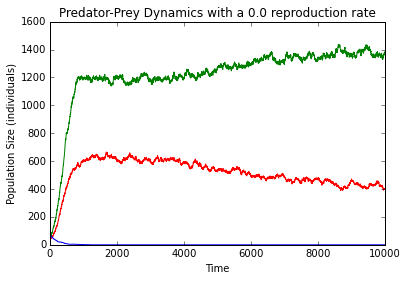

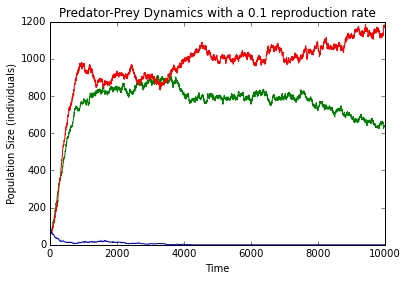

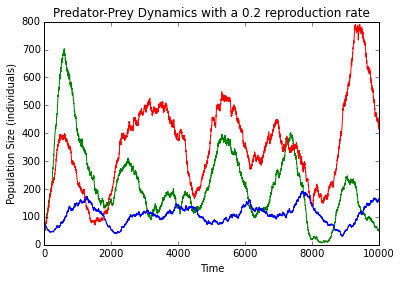

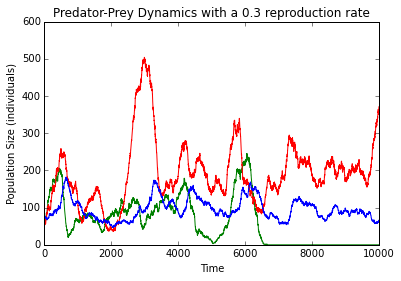

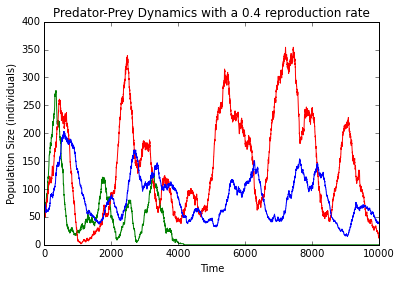

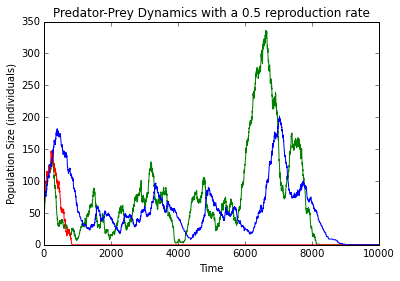

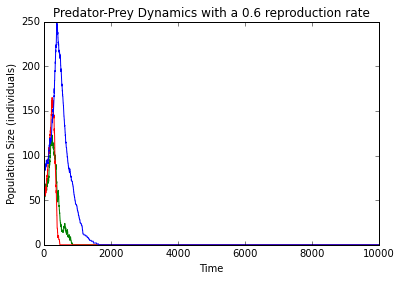

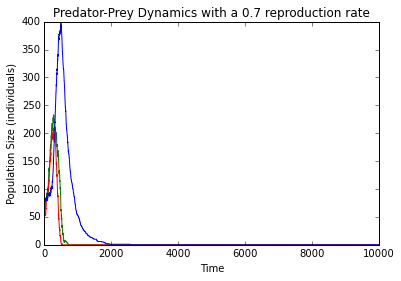

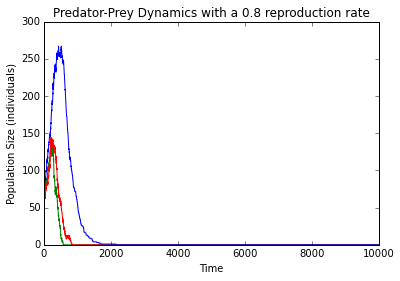

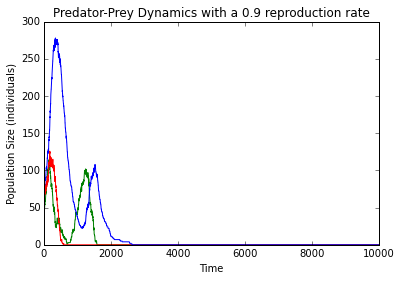

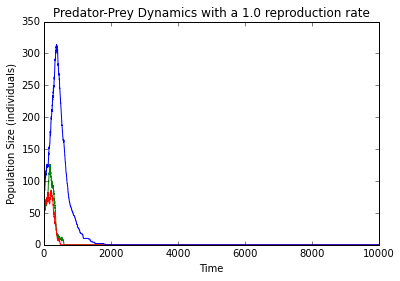

In [30]:
#Unbiased Predator
xDim=50
yDim=50
xMin=1
yMin=1
xMax=xDim-1
yMax=yDim-1
bunnyStartPop=50
squirrelStartPop=50
wolfStartPop=75
predatorReproductionRates=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
numberCoexistCondition2=list()
numberCoexistCondition2=createCoexistenceTrackingList(numberCoexistCondition2,len(predatorReproductionRates))
Ntime=10000 #change this to change how many loops the main simulation loop runs through
Nmoves=100 #change this to change how moves are done before the populations are recorded (makes it faster)
Ntrials=10 #change this to change how many times the whole simulation loop runs through (change sample size)

for trials in range(Ntrials):
    iterator=0 #this is used to iterate loops to make things easier
    for predatorReproductionRate in predatorReproductionRates:
        #First, create the arena and make it empty
        arena=createArena(xDim,yDim)
        #Next, populate the arena with bunnies and squirrels
        arena=populateArena(arena,bunny,bunnyStartPop)
        arena=populateArena(arena,squirrel,squirrelStartPop)
        arena=populateArena(arena,wolf,wolfStartPop)

        #make lists to hold species population counts so can track changes
        bunnyCount=list()
        squirrelCount=list()
        wolfCount=list()

        #main simulation loop
        for time in range(Ntime):
            for moves in range(Nmoves):
                #pick a random location in the arena
                xPosition=random.randint(1,xDim-1)
                yPosition=random.randint(1,yDim-1)

                #do different activities based on what's at location
                if arena[xPosition][yPosition]==1: #a bunny is in this location
                    newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                    if random.random()>0.5:
                        #hop
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                            arena[xPosition][yPosition]=0
                    else:
                        #make offspring
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                else:
                    if arena[xPosition][yPosition]==2: #a squirrel is in this location
                        newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                        if random.random()>0.5:
                            #move
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                                arena[xPosition][yPosition]=0
                        else:
                            #make offspring
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                    else:
                        if arena[xPosition][yPosition]==3: #a wolf is in this location
                            numberSurroundingBunnies=0
                            numberSurroundingSquirrels=0
                            numberEmptySpaces=0
                            xOffsetList=[0,1,1,1,0,-1,-1,-1]
                            yOffsetList=[-1,-1,0,1,1,1,0,-1]
                            for xOffsets in xOffsetList:
                                for yOffsets in yOffsetList:
                                    if arena[xPosition+xOffsets][yPosition+yOffsets]==1:
                                        numberSurroundingBunnies=numberSurroundingBunnies+1
                                    else:
                                        if arena[xPosition+xOffsets][yPosition+yOffsets]==2:
                                            numberSurroundingSquirrels=numberSurroundingSquirrels+1   
                                        else:
                                            if arena[xPosition+xOffsets][yPosition+yOffsets]==0:
                                                numberEmptySpaces=numberEmptySpaces+1
                            if numberSurroundingSquirrels!=0 or numberSurroundingBunnies!=0:
                                #there's prey around so eat randomly
                                eatAny(arena,xPosition,yPosition,predatorReproductionRate)
                            if numberSurroundingBunnies==0 and numberSurroundingSquirrels==0 and numberEmptySpaces!=0:
                                #means there's no prey around so just move
                                moveNotEat(arena,xPosition,yPosition)

                #this will cause random mortality to simulate death due to natural causes
                if random.random()<0.1:
                    x=random.randint(1,xDim-2)
                    y=random.randint(1,yDim-2)
                    arena[x][y]=0

            count=trackPopulation(arena)
            bunnyCount.append(count[1])
            squirrelCount.append(count[2])
            wolfCount.append(count[3])
            
        if bunnyCount[Ntime-1]!=0 and squirrelCount[Ntime-1]!=0 and wolfCount[Ntime-1]!=0: #all need to be alive for it to be a stable coexistence
            numberCoexistCondition2[iterator]=numberCoexistCondition2[iterator]+1
    
        if trials==1:
            #imshow(arena,interpolation="nearest")
            figure()
            title("Predator-Prey Dynamics with a {0} reproduction rate".format(predatorReproductionRates[iterator]))
            plot(bunnyCount,'g')
            plot(squirrelCount,'r')
            plot(wolfCount,'b')
            xlabel("Time")
            ylabel("Population Size (individuals)")
        
        iterator=iterator+1
print "The two species were able to coexist {0} times.".format(numberCoexistCondition2) 
#order of coexistence list is same as predator reproduction rates list (so the first rate corresponds to the first number in the coexistence list)

The two species were able to coexist [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10] times.


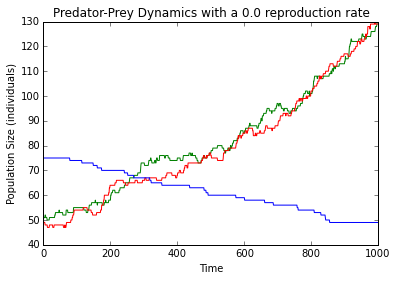

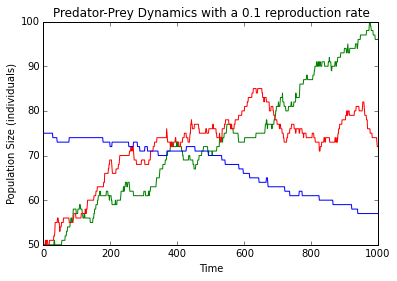

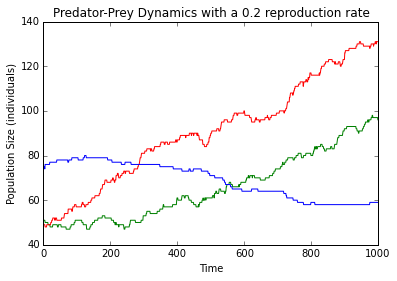

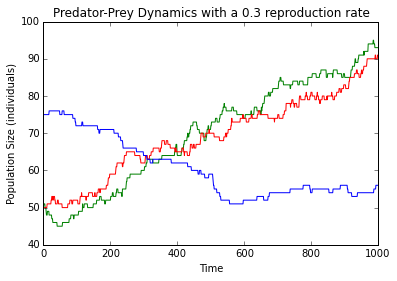

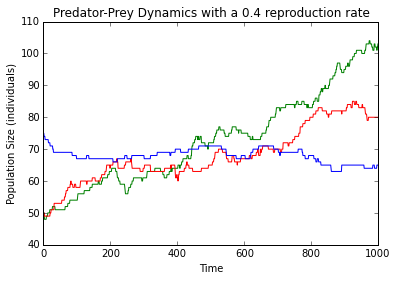

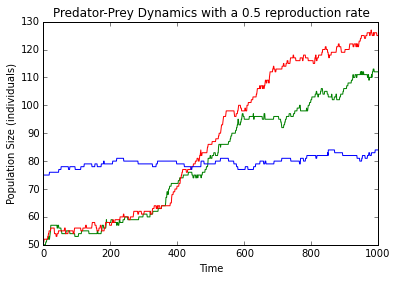

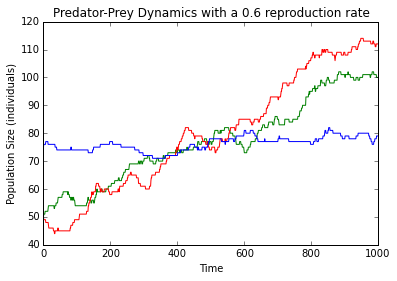

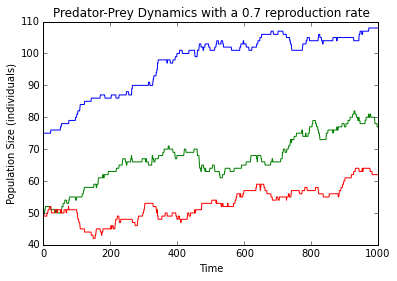

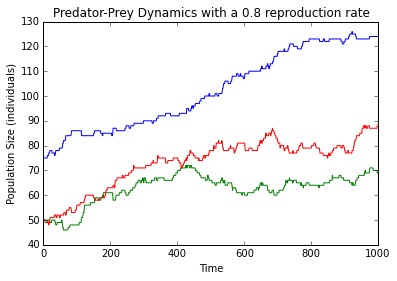

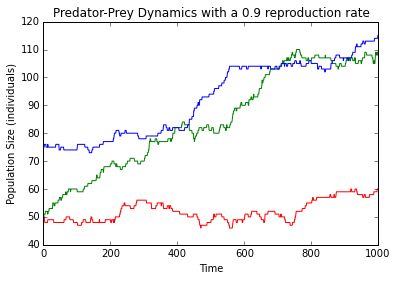

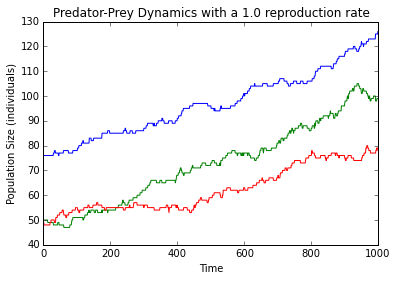

In [15]:
#Unbiased Predator for a short number of runs
xDim=50
yDim=50
xMin=1
yMin=1
xMax=xDim-1
yMax=yDim-1
bunnyStartPop=50
squirrelStartPop=50
wolfStartPop=75
predatorReproductionRates=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
numberCoexistCondition2=list()
numberCoexistCondition2=createCoexistenceTrackingList(numberCoexistCondition2,len(predatorReproductionRates))
Ntime=1000 #change this to change how many loops the main simulation loop runs through
Nmoves=10 #change this to change how moves are done before the populations are recorded (makes it faster)
Ntrials=10 #change this to change how many times the whole simulation loop runs through (change sample size)

for trials in range(Ntrials):
    iterator=0 #this is used to iterate loops to make things easier
    for predatorReproductionRate in predatorReproductionRates:
        #First, create the arena and make it empty
        arena=createArena(xDim,yDim)
        #Next, populate the arena with bunnies and squirrels
        arena=populateArena(arena,bunny,bunnyStartPop)
        arena=populateArena(arena,squirrel,squirrelStartPop)
        arena=populateArena(arena,wolf,wolfStartPop)

        #make lists to hold species population counts so can track changes
        bunnyCount=list()
        squirrelCount=list()
        wolfCount=list()

        #main simulation loop
        for time in range(Ntime):
            for moves in range(Nmoves):
                #pick a random location in the arena
                xPosition=random.randint(1,xDim-1)
                yPosition=random.randint(1,yDim-1)

                #do different activities based on what's at location
                if arena[xPosition][yPosition]==1: #a bunny is in this location
                    newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                    if random.random()>0.5:
                        #hop
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                            arena[xPosition][yPosition]=0
                    else:
                        #make offspring
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                else:
                    if arena[xPosition][yPosition]==2: #a squirrel is in this location
                        newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                        if random.random()>0.5:
                            #move
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                                arena[xPosition][yPosition]=0
                        else:
                            #make offspring
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                    else:
                        if arena[xPosition][yPosition]==3: #a wolf is in this location
                            numberSurroundingBunnies=0
                            numberSurroundingSquirrels=0
                            numberEmptySpaces=0
                            xOffsetList=[0,1,1,1,0,-1,-1,-1]
                            yOffsetList=[-1,-1,0,1,1,1,0,-1]
                            for xOffsets in xOffsetList:
                                for yOffsets in yOffsetList:
                                    if arena[xPosition+xOffsets][yPosition+yOffsets]==1:
                                        numberSurroundingBunnies=numberSurroundingBunnies+1
                                    else:
                                        if arena[xPosition+xOffsets][yPosition+yOffsets]==2:
                                            numberSurroundingSquirrels=numberSurroundingSquirrels+1   
                                        else:
                                            if arena[xPosition+xOffsets][yPosition+yOffsets]==0:
                                                numberEmptySpaces=numberEmptySpaces+1
                            if numberSurroundingSquirrels!=0 or numberSurroundingBunnies!=0:
                                #there's prey around so eat randomly
                                eatAny(arena,xPosition,yPosition,predatorReproductionRate)
                            if numberSurroundingBunnies==0 and numberSurroundingSquirrels==0 and numberEmptySpaces!=0:
                                #means there's no prey around so just move
                                moveNotEat(arena,xPosition,yPosition)

                #this will cause random mortality to simulate death due to natural causes
                if random.random()<0.1:
                    x=random.randint(1,xDim-2)
                    y=random.randint(1,yDim-2)
                    arena[x][y]=0

            count=trackPopulation(arena)
            bunnyCount.append(count[1])
            squirrelCount.append(count[2])
            wolfCount.append(count[3])
            
        if bunnyCount[Ntime-1]!=0 and squirrelCount[Ntime-1]!=0 and wolfCount[Ntime-1]!=0: #all need to be alive for it to be a stable coexistence
            numberCoexistCondition2[iterator]=numberCoexistCondition2[iterator]+1
    
        if trials==1:
            #imshow(arena,interpolation="nearest")
            figure()
            title("Predator-Prey Dynamics with a {0} reproduction rate".format(predatorReproductionRates[iterator]))
            plot(bunnyCount,'g')
            plot(squirrelCount,'r')
            plot(wolfCount,'b')
            xlabel("Time")
            ylabel("Population Size (individuals)")
        
        iterator=iterator+1
print "The two species were able to coexist {0} times.".format(numberCoexistCondition2) 
#order of coexistence list is same as predator reproduction rates list (so the first rate corresponds to the first number in the coexistence list)

#### Conclusions from Condition 2

As you can see from the results above, coexistence was rarely possible for the two prey species even in the presence of a predator at any predator reproduction rate, when a large length of time was measured. That being said, coexistence occurred much more often than expected, potentially indicating that the simulaion was not run long enough. As you can see when the model ran for less time, there were many more instances of coexistence assumedly because there had not been enough time for one of the prey species to be competitively exclued. 

For the simulation with a long time span:
These results indicate that the sole presence of a predator is often not enough to enable prey coexistence on a long term scale. In the simulations with a very low predator reproduction rate (0.0 and 0.1) what looks like a stable system was established in the sample graphs shown, in that the two prey species were coexisting together were the simulation stopped. However, we saw through Condition 1 that one of the prey species would've eventually gone extinct given enough time so the system was not stabe. 

While coexistence was shown to be often not possible with an unbiased predator, the presence of the predator did sometimes allow for coexistence when the predator reproduction rate was 0.1, 0.2, or 0.3. The coexistence seen in these cases is most likely not stable, and will probably lead to at least one prey species going extinct given enough time since coexistence did not occur every trial. For predator reproduction rates of 0.2, though, coexistence occurred in most of the trials so it is possible that coexistence can occur for the length of time these trials were run at in the presence of an unbiased predator that has a 0.2 reproductive rate. Changing the length of time will probably change the number of coexistence incidents, show these results are very context dependent.

On the sample graphs shown, the conditions seem to lead to what looks like stable predator-prey interactions when the predator reproduction rate was 0.2, 0.3, or 0.4. In the case of a 0.2 rate, all three species were coexisting and exhibiting cyclic population dynamics. In the latter two cases, one prey species died out, leaving one prey species and the predator species coexisting and exhibiting cyclic population dynamics. A cycle such as this can be maintained indefinitely in nature (for exampe, the snowshoe hare/lynx example), and was maintained through the simulation which could indicate that a stable system was established. Of course, it is possible that given more time both of the remaining species would have gone extinct but as far as we can tell from the time span shown, the predator and prey species will often be able to persist in a stable manner at those reproductive rates.

The effect of predator reproduction rate on the ability of species to persist is strongly shown through the fact that all species died out when predator reproduction rate was 0.5 or above. This indicates that if a predator is reproducing too fast (or to put it in more biological terms you could say the predator is converting energy from its prey into offspring too fast/efficiently) then a stable system cannot be maintained, as it will reproduce faster and eat prey faster than the prey can maintain its populations, leading to the prey going extinct and the predator soon following. Also, we can see that if its reproduction rate is too low a predator will not be able to eat prey and reproduce enough to maintain its popualtion in the face of random mortality.

For the simulation with a short time span:
Coexistence was possible for all reproduction rates in all trials when a short time was used, and it's difficult to see how the dynamics of the system would shake out given longer time. If one looked solely at the short time span results, then it would give one the impression that coexistence is not only possible, but also common in the presence of a predator. However, this result is probably due to an insufficient time span for competitive exclusion not to the predator actually stablizing the system. Again, a longer time span is preferable in order to see the true results of the system but that makes getting results more time consuming.

# Condition 3: Biased Predator

In this simulation, the predator will eat the most abundant prey, whichever it is. It will assess the amount of each type of prey in the eight positions around it and then eat one prey of the species that is most abundant, which is chosen from those surrounding it randomly.

NOTE: The cell below takes a LONG TIME to run (at least as long as the Condition 1 code) so you should reduce the number of trials, time, and moves to much smaller numbers if you want it to run faster.

The two species were able to coexist [0, 3, 6, 1, 0, 0, 0, 0, 0, 0, 0] times.


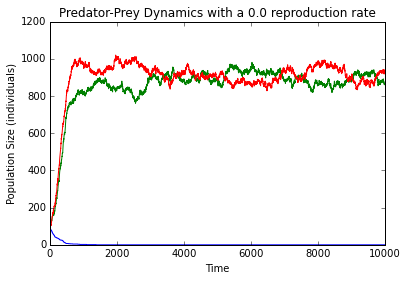

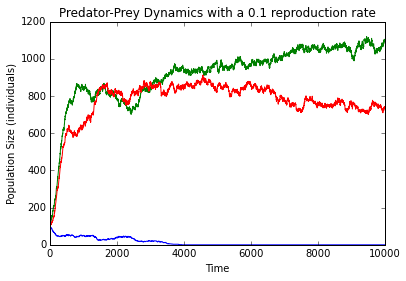

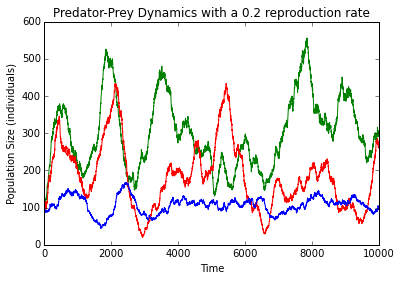

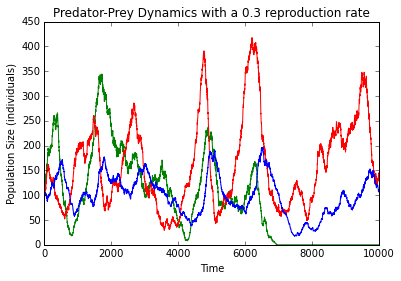

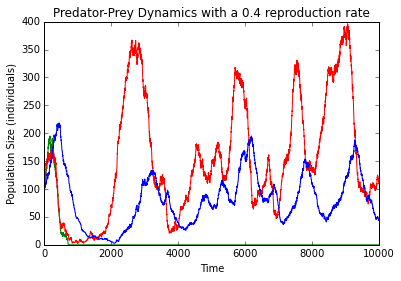

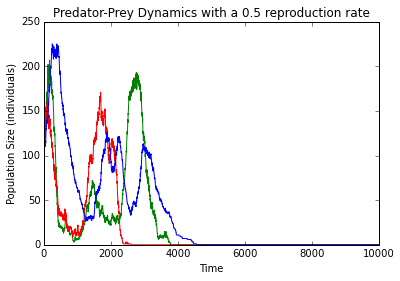

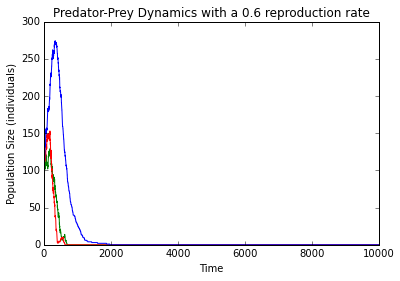

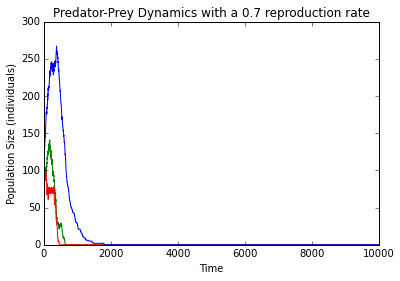

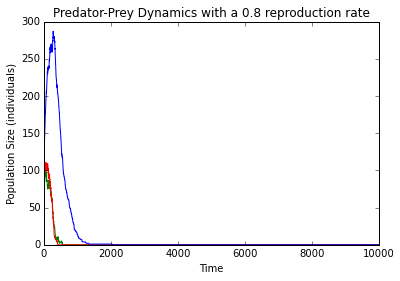

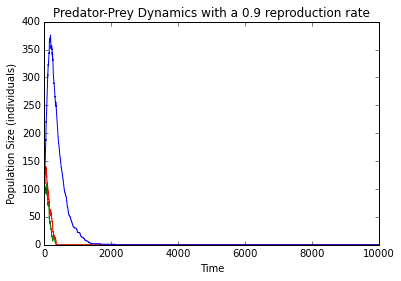

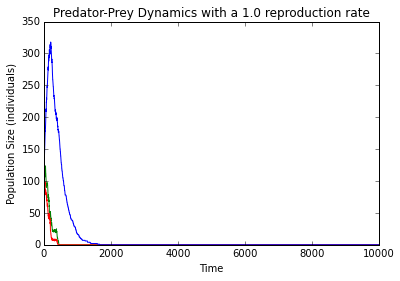

In [31]:
xDim=50
yDim=50
xMin=1
yMin=1
xMax=xDim-1
yMax=yDim-1
bunnyStartPop=100
squirrelStartPop=100
wolfStartPop=100
predatorReproductionRates=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
numberCoexistCondition3=list()
numberCoexistCondition3=createCoexistenceTrackingList(numberCoexistCondition3,len(predatorReproductionRates))
Ntime=10000 #change this to change how many loops the main simulation loop runs through
Nmoves=100 #change this to change how moves are done before the populations are recorded (makes it faster)
Ntrials=10 #change this to change how many times the whole simulation loop runs through (change sample size)

for trials in range(Ntrials):
    iterator=0 #this is used to iterate loops to make things easier
    for predatorReproductionRate in predatorReproductionRates:
        #First, create the arena and make it empty
        arena=createArena(xDim,yDim)
        #Next, populate the arena with bunnies and squirrels
        arena=populateArena(arena,bunny,bunnyStartPop)
        arena=populateArena(arena,squirrel,squirrelStartPop)
        arena=populateArena(arena,wolf,wolfStartPop)

        #make lists to hold species population counts so can track changes
        bunnyCount=list()
        squirrelCount=list()
        wolfCount=list()

        #main simulation loop
        for time in range(Ntime):
            for moves in range(Nmoves):
                #pick a random location in the arena
                xPosition=random.randint(1,xDim-1)
                yPosition=random.randint(1,yDim-1)

                #do different activities based on what's at location
                if arena[xPosition][yPosition]==1: #a bunny is in this location
                    newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                    if random.random()>0.5:
                        #hop
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                            arena[xPosition][yPosition]=0
                    else:
                        #make offspring
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                else:
                    if arena[xPosition][yPosition]==2: #a squirrel is in this location
                        newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                        if random.random()>0.5:
                            #move
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                                arena[xPosition][yPosition]=0
                        else:
                            #make offspring
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                    else:
                        if arena[xPosition][yPosition]==3: #a wolf is in this location                    
                            #count the number of bunnies/squirrels around prey to find most populous
                            numberSurroundingBunnies=0
                            numberSurroundingSquirrels=0
                            numberEmptySpaces=0
                            xOffsetList=[0,1,1,1,0,-1,-1,-1]
                            yOffsetList=[-1,-1,0,1,1,1,0,-1]
                            for xOffsets in xOffsetList:
                                for yOffsets in yOffsetList:
                                    if arena[xPosition+xOffsets][yPosition+yOffsets]==1:
                                        numberSurroundingBunnies=numberSurroundingBunnies+1
                                    else:
                                        if arena[xPosition+xOffsets][yPosition+yOffsets]==2:
                                            numberSurroundingSquirrels=numberSurroundingSquirrels+1
                                        else:
                                            if arena[xPosition+xOffsets][yPosition+yOffsets]==0:
                                                numberEmptySpaces=numberEmptySpaces+1
                            if numberSurroundingSquirrels>numberSurroundingBunnies:
                                #if more squirrels than bunnies,eat a random squirrel
                                eatSquirrel(arena,xPosition,yPosition,predatorReproductionRate)
                            if numberSurroundingBunnies>numberSurroundingSquirrels:
                                #if more bunnies than squirrels,eat a random bunny
                                eatBunny(arena,xPosition,yPosition,predatorReproductionRate)                     
                            if numberSurroundingBunnies==numberSurroundingSquirrels and numberSurroundingBunnies!=0:
                                #eat randomly if both are eqally populous around wolf
                                eatAny(arena,xPosition,yPosition,predatorReproductionRate)
                            if numberSurroundingBunnies==0 and numberSurroundingSquirrels==0 and numberEmptySpaces!=0:
                                #means there's no prey around so just move
                                moveNotEat(arena,xPosition,yPosition)
                            #if numberSurroundingBunnies==0 and numberSurroundingSquirrels==0 and numberEmptySpaces==0:
                                #arena[x][y]=0 #will cause mortality


                #this will cause random mortality to simulate death due to natural causes
                if random.random()<0.1:
                    x=random.randint(1,xDim-2)
                    y=random.randint(1,yDim-2)
                    arena[x][y]=0

            count=trackPopulation(arena)
            bunnyCount.append(count[1])
            squirrelCount.append(count[2])
            wolfCount.append(count[3])
            
        if bunnyCount[Ntime-1]!=0 and squirrelCount[Ntime-1]!=0 and wolfCount[Ntime-1]!=0:
            numberCoexistCondition3[iterator]=numberCoexistCondition3[iterator]+1
    
        if trials==1:
            #imshow(arena,interpolation="nearest")
            figure()
            title("Predator-Prey Dynamics with a {0} reproduction rate".format(predatorReproductionRates[iterator]))
            plot(bunnyCount,'g')
            plot(squirrelCount,'r')
            plot(wolfCount,'b')
            xlabel("Time")
            ylabel("Population Size (individuals)")

        iterator=iterator+1
print "The two species were able to coexist {0} times.".format(numberCoexistCondition3)

The two species were able to coexist [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10] times.


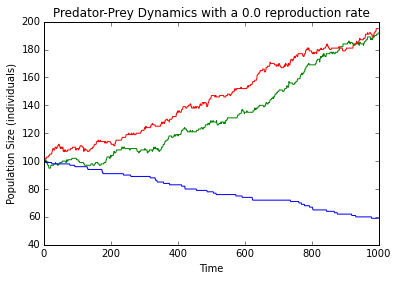

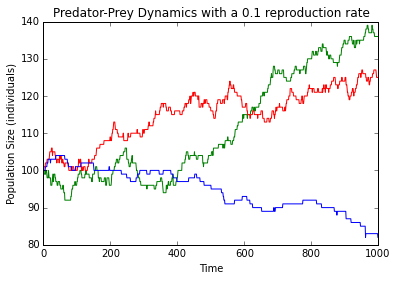

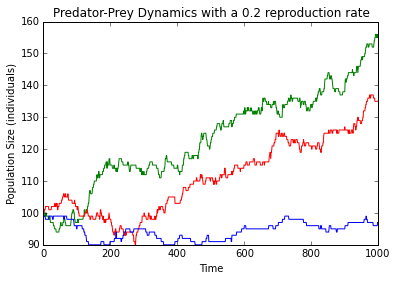

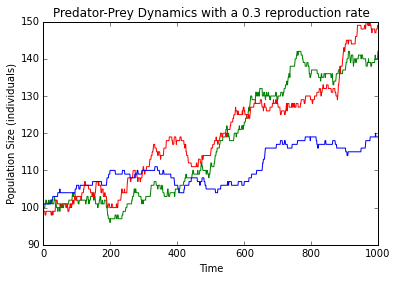

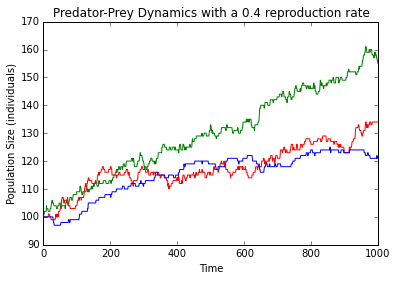

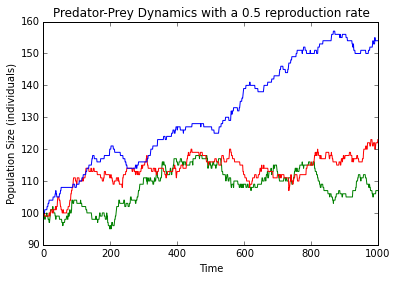

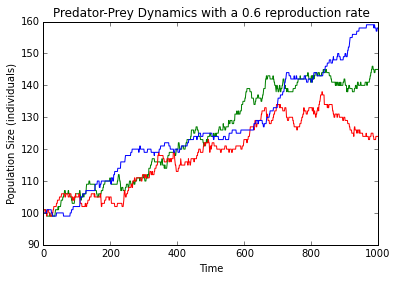

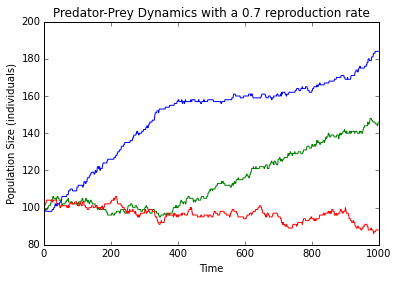

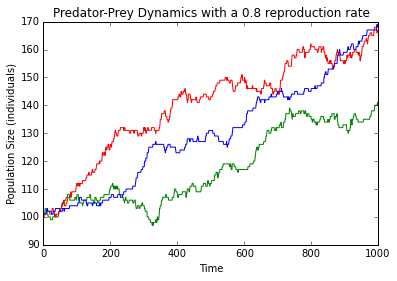

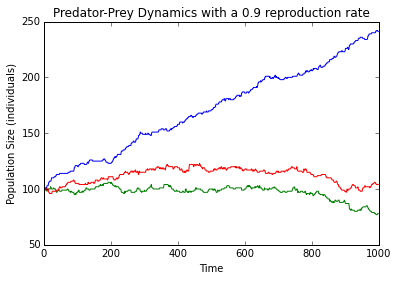

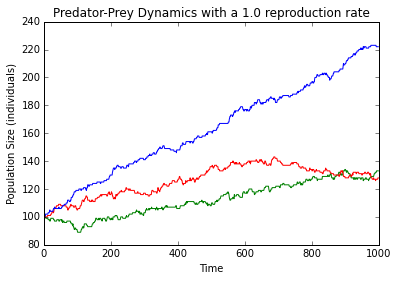

In [16]:
#This is Condition 3 with a shorter time period.
xDim=50
yDim=50
xMin=1
yMin=1
xMax=xDim-1
yMax=yDim-1
bunnyStartPop=100
squirrelStartPop=100
wolfStartPop=100
predatorReproductionRates=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
numberCoexistCondition3=list()
numberCoexistCondition3=createCoexistenceTrackingList(numberCoexistCondition3,len(predatorReproductionRates))
Ntime=1000 #change this to change how many loops the main simulation loop runs through
Nmoves=10 #change this to change how moves are done before the populations are recorded (makes it faster)
Ntrials=10 #change this to change how many times the whole simulation loop runs through (change sample size)

for trials in range(Ntrials):
    iterator=0 #this is used to iterate loops to make things easier
    for predatorReproductionRate in predatorReproductionRates:
        #First, create the arena and make it empty
        arena=createArena(xDim,yDim)
        #Next, populate the arena with bunnies and squirrels
        arena=populateArena(arena,bunny,bunnyStartPop)
        arena=populateArena(arena,squirrel,squirrelStartPop)
        arena=populateArena(arena,wolf,wolfStartPop)

        #make lists to hold species population counts so can track changes
        bunnyCount=list()
        squirrelCount=list()
        wolfCount=list()

        #main simulation loop
        for time in range(Ntime):
            for moves in range(Nmoves):
                #pick a random location in the arena
                xPosition=random.randint(1,xDim-1)
                yPosition=random.randint(1,yDim-1)

                #do different activities based on what's at location
                if arena[xPosition][yPosition]==1: #a bunny is in this location
                    newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                    if random.random()>0.5:
                        #hop
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                            arena[xPosition][yPosition]=0
                    else:
                        #make offspring
                        if arena[newX][newY]==0:
                            arena[newX][newY]=1
                else:
                    if arena[xPosition][yPosition]==2: #a squirrel is in this location
                        newX,newY=findNewLocation(xPosition,yPosition,xMax,yMax,xMin,yMin)
                        if random.random()>0.5:
                            #move
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                                arena[xPosition][yPosition]=0
                        else:
                            #make offspring
                            if arena[newX][newY]==0:
                                arena[newX][newY]=2
                    else:
                        if arena[xPosition][yPosition]==3: #a wolf is in this location                    
                            #count the number of bunnies/squirrels around prey to find most populous
                            numberSurroundingBunnies=0
                            numberSurroundingSquirrels=0
                            numberEmptySpaces=0
                            xOffsetList=[0,1,1,1,0,-1,-1,-1]
                            yOffsetList=[-1,-1,0,1,1,1,0,-1]
                            for xOffsets in xOffsetList:
                                for yOffsets in yOffsetList:
                                    if arena[xPosition+xOffsets][yPosition+yOffsets]==1:
                                        numberSurroundingBunnies=numberSurroundingBunnies+1
                                    else:
                                        if arena[xPosition+xOffsets][yPosition+yOffsets]==2:
                                            numberSurroundingSquirrels=numberSurroundingSquirrels+1
                                        else:
                                            if arena[xPosition+xOffsets][yPosition+yOffsets]==0:
                                                numberEmptySpaces=numberEmptySpaces+1
                            if numberSurroundingSquirrels>numberSurroundingBunnies:
                                #if more squirrels than bunnies,eat a random squirrel
                                eatSquirrel(arena,xPosition,yPosition,predatorReproductionRate)
                            if numberSurroundingBunnies>numberSurroundingSquirrels:
                                #if more bunnies than squirrels,eat a random bunny
                                eatBunny(arena,xPosition,yPosition,predatorReproductionRate)                     
                            if numberSurroundingBunnies==numberSurroundingSquirrels and numberSurroundingBunnies!=0:
                                #eat randomly if both are eqally populous around wolf
                                eatAny(arena,xPosition,yPosition,predatorReproductionRate)
                            if numberSurroundingBunnies==0 and numberSurroundingSquirrels==0 and numberEmptySpaces!=0:
                                #means there's no prey around so just move
                                moveNotEat(arena,xPosition,yPosition)
                            #if numberSurroundingBunnies==0 and numberSurroundingSquirrels==0 and numberEmptySpaces==0:
                                #arena[x][y]=0 #will cause mortality


                #this will cause random mortality to simulate death due to natural causes
                if random.random()<0.1:
                    x=random.randint(1,xDim-2)
                    y=random.randint(1,yDim-2)
                    arena[x][y]=0

            count=trackPopulation(arena)
            bunnyCount.append(count[1])
            squirrelCount.append(count[2])
            wolfCount.append(count[3])
            
        if bunnyCount[Ntime-1]!=0 and squirrelCount[Ntime-1]!=0 and wolfCount[Ntime-1]!=0:
            numberCoexistCondition3[iterator]=numberCoexistCondition3[iterator]+1
    
        if trials==1:
            #imshow(arena,interpolation="nearest")
            figure()
            title("Predator-Prey Dynamics with a {0} reproduction rate".format(predatorReproductionRates[iterator]))
            plot(bunnyCount,'g')
            plot(squirrelCount,'r')
            plot(wolfCount,'b')
            xlabel("Time")
            ylabel("Population Size (individuals)")

        iterator=iterator+1
print "The two species were able to coexist {0} times.".format(numberCoexistCondition3)

#### Conclusions from Condition 3

As you can see from the results above, coexistence was also rarely possible for the two prey species even in the presence of a selective predator at any predator reproduction rate, at least for the longer length of time measured. However, it was not as common as expected though as it occurred the same number of times as it did with an unselective predator.  When the model ran for less time, there probably were more instances of coexistence because there had not been enough time for one of the prey species to be competitively exclued (I assume). 

For a longer time span:
The results above indicate that the presence of a selective predator is often not enough to enable prey coexistence on a long term scale. In addition, there doesn't seem to be a large difference between the potential for coexistence with an unbiased and with a biased predator. Both Conditions 2 and 3 led to 10 instances of coexistence in total, where Condition 2 had one more instance of coexistence when the predator reproduction rate was 0.2 than did Condition 3, while Condition 3 had one more instance when the reproduction rate was 0.1.

So, it seems as though both a selective and an unselective predator can lead to coexistence. If the simulations were run for a longer time, though, this would potentially change. For example, when I ran these simulations with a time of 5000 and moves set to 1000, there were 0 instances of coexistence in Condition 2 and only 3 instances of coexistence in Condition 3 (1 at 0.1 and 2 at 0.2). It's therefore possible that more time is needed to see the true likelihood of coexistence in each scenario. Given the fact that each simulation already takes over an hour to run at the given time/moves, though, it is not very efficient to run it longer. 

In the sample graphs shown for Condition 3, coexistence is seen at the predator reproduction rate of 0.2, and stable predator-prey dynamics were seen when the rate was 0.3 or 0.4. In those cases, the extinction of 1 predator led to cyclic population dynamics of the remaining prey species and the predator that could potentially continue indefinitely. As seen in Condition 2, predator reproduction rates of 0.5 or higher led to all of the species going extinction. This is assumedly because the predators were reproducing too quickly for the prey populations to keep up. 

Predator reproduction rate seems to play a large role in the potential for stable population dynamics in these simulations, as when it becomes too high all of the species go to extinction so a stable system is not possible. The best predator reproduction rate for coexistence seems to be 0.1 and 0.2 for systems with an unbiased or a biased predator. Stable dynamics were seen for more reproduction rates than those (0.1-0.4), but sometimes the stable dynamics seemded to be the result of one prey species dying out as seen by the fact that they were established after the extinction of one species.

For a shorter time span:
Coexistence was possible in all scenarios (all reproduction rates) just as was seen with an unselective predator. That the same results were seen in both cases (both types of predators) might indicate that more time is needed to see how the type of predator actually affects the stability of the system, so a longer time span for the simulations would give more interesting and accurate results. 

# Conclusion

In this project, I was trying to determine what predator conditions are most likely to allow for coexistence of prey species that share a niche, as well as which conditions can lead to a stable system (in any form). I hypothesized that coexistence will only be present in the presence of a selective predator and that mid-level reproductive rates would be more likely to promote coexistence than other rates.

My simulations do not support my hypothesis that only a selective predator will allow coexistence, as coexistence occurred the same number of times with a selective predator as with an unselective one. It is probable that these result would change if the simulations were run for an increased length of time, but that is not ideal to do since they already take over an hour to run as is. Based on the results seen here, it seems as though both a selective and an unselective predator can allow for coexistence but only at certain predator reproduction rates.

Reproduction rate seems to be more important for coexistence and stable dynamics than the type of predator does. Reproduction rates that were too high (0.5 or higher) not only didn't lead to coexistence, but actually led to all species dying out in the sample graphs shown for the simulations. My hypothesis that a mid-level rate would be best was also not supported, as coexistence was most often seen at very low reproduction rates (0.1-0.2) suggesting that predators must have much lower reproduction rates than their prey (which had rates of 0.5) in order to keep from driving the prey to extinction. 

Stable predator-prey dynamics were also seen with both types of predators, and mainly occurred after 1 prey species died out. Again, though, reproduction rate seemed to matter as if it was too high (equal to or above the prey rate) then the remaining prey would still be driven to extinction. In cases where stable dynamics occurred (based on the sample graphs shown for each condition), they seemed to be cyclic interactions. 

It is difficult to know if these results held true throughout each trial since only one is printed out, but in the interest of saving space it seemed best to only print out 1 trial. If all of the graphs had been printed out, there would've been 110 (10 trials, each with 11 reproductive rates) which seemed a little excessive.

In conclusion, both coexistence and stable predator-prey dynamics (between only 1 prey and a predator) seem to be possible with a selective and with an unselective predator. The reproductive rate seems to exert the strongest influence on the dynamics of the system, which was somewhat unexpected. These results must be taken with a grain of salt, though, as the incidences of coexistence can be greatly changed when one changes the length of time for which the simulations run. 


potential way to go further- average population sizes over trials for each species over a time period and then graph how they change as parameter changes